### **HW1-FRA503 Machine Learning**

### **Objective Goals**

The purposes of this project are:

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

### **Due date**
Tuesday 31/10/2023

### **Authors**


1. Natchanon Singha        64340500017

2. Thanaphan Rueangsuk     64340500025

### **Instructions**

1. You have to work on this project with classmates (1-3 people per group).
2. You must use the Python notebook (files.ipynb) for your written report to explain the processes of building the machine learning models.
3. The report must contain the contents following “Project Assignment”.

### **Project Assignment**

**Your notebook must contain the following contents:**

**1. Data Exploration**
- How many attributes in the dataset
- Observations of good and bad things about the dataset 
- List of all attributes that you would keep or remove from the dataset and why 

**2. Data Preprocessing**
- Missing Values 
- Feature Selection 
- Feature extraction

**3. Model Construction (Linear and Logistic regression model)**
- Code (Python) description
- Experimentation with different preprocessing
- Experimentation with different testing modes
- Presentation of resulting model and evaluation
- Observations and analysis of results

## 1. Data Exploration


The dataset that will be used for analysis and modeling machine learning is taken from https://drive.google.com/drive/folders/1ZiGHe1q6rD-4qi0rhJBOJXvfck-0UE_P.


**You can elaborate more on your dataset such as the number and the meaning of attributes or problems arising in the dataset before using in the modeling.**

Import libary(s) and Access to the Dataset
- Import Pandas and Numpy to process the dataset.
- Using read_excel() to read the excel file(s).

**Exporting all of Schema from the dataset**

From the ECT dataset, there  9 sub-sheats, 48 features which shown below. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_rcp = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_PartyList') 
df_inpro =  pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_province') 
df_prov =   pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_party_overview') 

schema = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='Schema')
selected_col = ['Sheet', 'Column', 'Description','Data Type_!']
schema = schema[selected_col]
schema

,Sheet,Column,Description,Data Type_!
0,Candidate_Constituency,mp_app_id,Candidate ID,Categorical (Norminal)
1,Candidate_Constituency,mp_app_no,Candidate Name,Categorical (Norminal)
2,Candidate_Constituency,mp_app_party_id,Party code,Categorical (Norminal)
3,Candidate_Constituency,mp_app_name,Candidate Name,String
4,Candidate_Constituency,image_url,The URL of Candidate img,String
5,Candidate_PartyList,party_no,Party No,String
6,Candidate_PartyList,list_no,Candidate List,Categorical (Norminal)
7,Candidate_PartyList,name,Candidate Name,String
8,Candidate_PartyList,image_url,The URL of Candidate img,String
9,Candidate_PM,party_no,Party No,Categorical (Norminal)


#**2. Defining the problem statement**

**The goal** 

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

**The assumption**

 Pheu Thai Party (พรรคเพื่อไทย) is the most popular party in the Northeastern part (Isan) of Thailand.

- **Target Variable:** mp_app_rank
- **Predictors:** mp_app_vote, cons_id, mp_app_id, party_id.

  * mp_app_rank = 1 means the that party_id will win in that consituency.
  * mp_app_rank = other numbers means the party_id will not win in that consituency.

- **Samples:**  The voter who is going to do an elective in the Northeastern part (Isan) of Thailand.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a Classifier Decision Tree model and K-Nearest Neighbors model.

**However, from the experimental assumption which focus on constituencies candidate election. Therefore, we need to focus on sheet_name='result_constituencies_Candidate' from the .excel file.**

In [75]:
df_rcp

,cons_id,party_id,party_list_vote,party_list_vote_percent
0,ACR_1,701,4550,4.30977
1,ACR_1,702,185,0.17523
2,ACR_1,703,67,0.06346
3,ACR_1,705,33576,31.80328
4,ACR_1,706,132,0.12503
...,...,...,...,...
26795,YST_3,780,145,0.13871
26796,YST_3,781,412,0.39414
26797,YST_3,783,17,0.01626
26798,YST_3,784,138,0.13202


In [76]:
valid_provinces = ['ACR','BKN','BRM','CPM','KKN','KSN','LEI','MDH','MKM','NBP','NKI','NMA','NPM','RET','SNK','SRN','SSK','UBN','UDN','YST']

In [77]:
df_inpro

,province_id,prov_id,province,eng,abbre_thai,total_registered_vote,total_vote_stations
0,37,ACR,อำนาจเจริญ,AMNAT CHAROEN,อจ,301354,641
1,15,ATG,อ่างทอง,ANG THONG,อท,224656,492
2,14,AYA,พระนครศรีอยุธยา,PHRA NAKHON SI AYUTTHAYA,อย,664431,1060
3,10,BKK,กรุงเทพมหานคร,BANGKOK,กทม,4479155,6360
4,38,BKN,บึงกาฬ,BUENG KAN,บก,327745,652
...,...,...,...,...,...,...,...
72,41,UDN,อุดรธานี,UDON THANI,อด,1248824,2252
73,61,UTI,อุทัยธานี,UTHAI THANI,อน,260983,617
74,53,UTT,อุตรดิตถ์,UTTARADIT,อต,368323,732
75,95,YLA,ยะลา,YALA,ยล,382271,596


In [78]:
df_prov

,id,party_no,name,abbr,color,logo_url
0,701,26.0,ประชาธิปัตย์,ปชป.,#06aff3,https://cdn.ectreport.com/images/logos/ประชาธิ...
1,702,63.0,ประชากรไทย,ปชท.,#0f41ce,https://cdn.ectreport.com/images/logos/ประชากร...
2,703,60.0,ความหวังใหม่,ควม.,#e6b750,https://cdn.ectreport.com/images/logos/ความหวั...
3,705,29.0,เพื่อไทย,พท.,#da3731,https://cdn.ectreport.com/images/logos/เพื่อไท...
4,706,14.0,ชาติพัฒนากล้า,ชพก.,#233e8a,https://cdn.ectreport.com/images/logos/ชาติพัฒ...
...,...,...,...,...,...,...
65,780,55.0,ไทยก้าวหน้า,ทกน.,#b9bee3,https://cdn.ectreport.com/images/logos/ไทยก้าว...
66,781,9.0,พลัง,พ.,#8e8fc7,https://cdn.ectreport.com/images/logos/พลัง.png
67,783,52.0,ชาติรุ่งเรือง,ชรร.,#9cb4c9,https://cdn.ectreport.com/images/logos/ชาติรุ่...
68,784,23.0,รวมใจไทย,ร.จ.ท.,#eec49a,https://cdn.ectreport.com/images/logos/รวมใจไท...


In [79]:
df_inpro_drop = df_inpro.copy()
df_inpro_drop = df_inpro_drop.drop(columns=['province_id','province','abbre_thai','total_vote_stations'], axis=1)
df_inpro_drop

,prov_id,eng,total_registered_vote
0,ACR,AMNAT CHAROEN,301354
1,ATG,ANG THONG,224656
2,AYA,PHRA NAKHON SI AYUTTHAYA,664431
3,BKK,BANGKOK,4479155
4,BKN,BUENG KAN,327745
...,...,...,...
72,UDN,UDON THANI,1248824
73,UTI,UTHAI THANI,260983
74,UTT,UTTARADIT,368323
75,YLA,YALA,382271


In [80]:
df_inpro_drop = df_inpro_drop[df_inpro_drop['prov_id'].isin(valid_provinces)].reset_index(drop=True).rename(columns={'prov_id':'cons_id'})
df_inpro_drop

,cons_id,eng,total_registered_vote
0,ACR,AMNAT CHAROEN,301354
1,BKN,BUENG KAN,327745
2,BRM,BURI RAM,1250148
3,CPM,CHAIYAPHUM,902888
4,KKN,KHON KAEN,1449595
5,KSN,KALASIN,788214
6,LEI,LOEI,504875
7,MDH,MUKDAHAN,276802
8,MKM,MAHA SARAKHAM,774191
9,NBP,NONG BUA LAM PHU,405513


In [81]:
df_prov_drop = df_prov.copy()
df_prov_drop = df_prov_drop.drop(columns=['abbr','color','logo_url','party_no'], axis=1).rename(columns={'id':'party_id'})
df_prov_drop

,party_id,name
0,701,ประชาธิปัตย์
1,702,ประชากรไทย
2,703,ความหวังใหม่
3,705,เพื่อไทย
4,706,ชาติพัฒนากล้า
...,...,...
65,780,ไทยก้าวหน้า
66,781,พลัง
67,783,ชาติรุ่งเรือง
68,784,รวมใจไทย


In [82]:
df_rcp_drop = df_rcp.copy()
df_rcp_drop = df_rcp_drop[df_rcp_drop['cons_id'].str.contains('|'.join(valid_provinces))].reset_index(drop=True)
df_rcp_drop = df_rcp_drop.drop(columns=('party_list_vote_percent'), axis=1)
df_rcp_drop

,cons_id,party_id,party_list_vote
0,ACR_1,701,4550
1,ACR_1,702,185
2,ACR_1,703,67
3,ACR_1,705,33576
4,ACR_1,706,132
...,...,...,...
8906,YST_3,780,145
8907,YST_3,781,412
8908,YST_3,783,17
8909,YST_3,784,138


In [83]:
df_rcp_drop.isnull().sum()

cons_id            0
party_id           0
party_list_vote    0
dtype: int64

In [84]:
# Dictionary to store DataFrames with valid provinces as keys
df_rcp = {}

# Loop through the valid_provinces list
for province in valid_provinces:
    df_rcp[province] = df_rcp_drop[df_rcp_drop['cons_id'].str.contains(province)]

In [85]:
# Print the DataFrames for each party ID
for province, data in df_rcp.items():
    print(f"{province} Data:")
    print(data)

ACR Data:
    cons_id  party_id  party_list_vote
0     ACR_1       701             4550
1     ACR_1       702              185
2     ACR_1       703               67
3     ACR_1       705            33576
4     ACR_1       706              132
..      ...       ...              ...
129   ACR_2       780              142
130   ACR_2       781             1036
131   ACR_2       783               13
132   ACR_2       784              287
133   ACR_2       786               99

[134 rows x 3 columns]
BKN Data:
    cons_id  party_id  party_list_vote
134   BKN_1       701              343
135   BKN_1       702              239
136   BKN_1       703               15
137   BKN_1       705            35797
138   BKN_1       706               64
..      ...       ...              ...
330   BKN_3       780               70
331   BKN_3       781              137
332   BKN_3       783                9
333   BKN_3       784              276
334   BKN_3       786               64

[201 rows x 3 colum

In [98]:
# Create separate DataFrames for 'ACR_1' and 'ACR_2'
acr_1_df = df_rcp['ACR'][df_rcp['ACR']['cons_id'] == 'ACR_1']
acr_2_df = df_rcp['ACR'][df_rcp['ACR']['cons_id'] == 'ACR_2']

# Reset the index if needed
acr_1_df.reset_index(drop=True, inplace=True)
acr_2_df.reset_index(drop=True, inplace=True)

# Find the maximum party_list_vote for each cons_id
max_votes_per_cons = acr_1_df.groupby('cons_id')['party_list_vote'].transform(max)

# Create a new column 'has_most_votes' to indicate if a party has the most votes
acr_1_df['has_most_votes'] = acr_1_df['party_list_vote'] == max_votes_per_cons
# Save the DataFrame to an Excel file
acr_1_df.to_excel('test.xlsx', index=False)

C:\Users\natch\AppData\Local\Temp\ipykernel_18708\271002782.py:10: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_votes_per_cons = acr_1_df.groupby('cons_id')['party_list_vote'].transform(max)
C:\Users\natch\AppData\Local\Temp\ipykernel_18708\271002782.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acr_1_df['has_most_votes'] = acr_1_df['party_list_vote'] == max_votes_per_cons


In [87]:
acr_1_df

,cons_id,party_id,party_list_vote
0,ACR_1,701,4550
1,ACR_1,702,185
2,ACR_1,703,67
3,ACR_1,705,33576
4,ACR_1,706,132
...,...,...,...
62,ACR_1,780,133
63,ACR_1,781,325
64,ACR_1,783,11
65,ACR_1,784,215


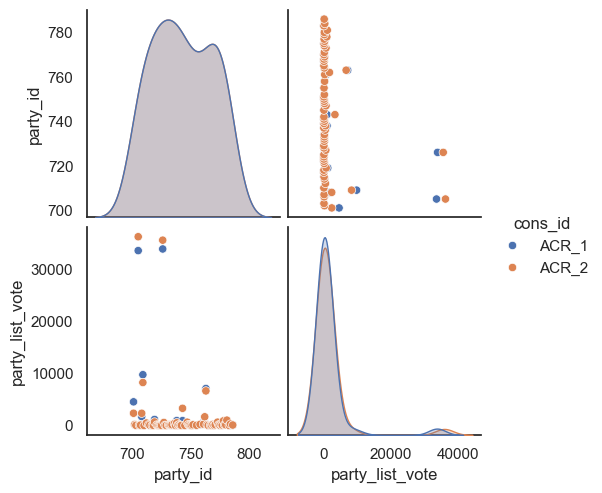

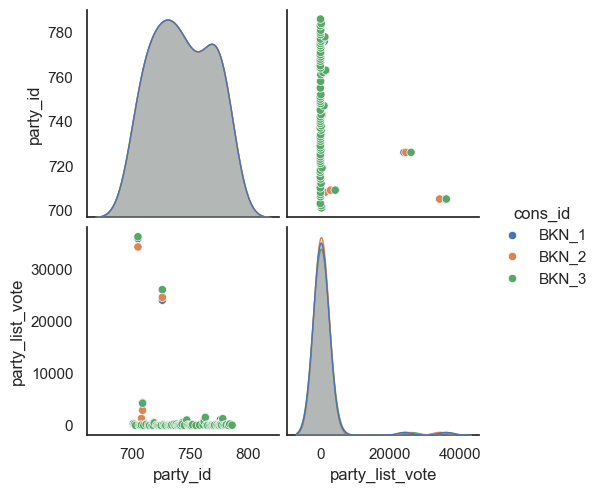

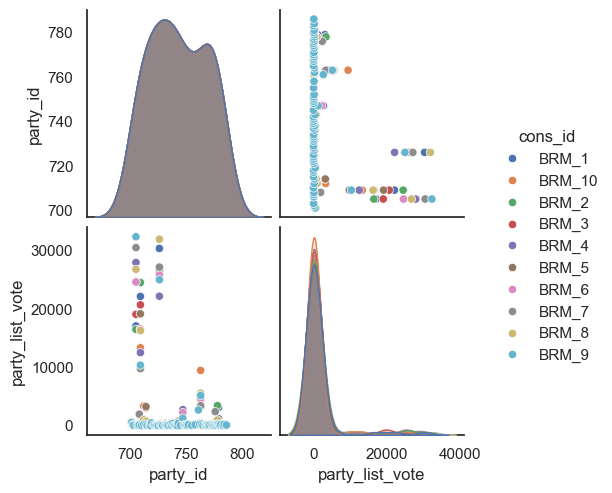

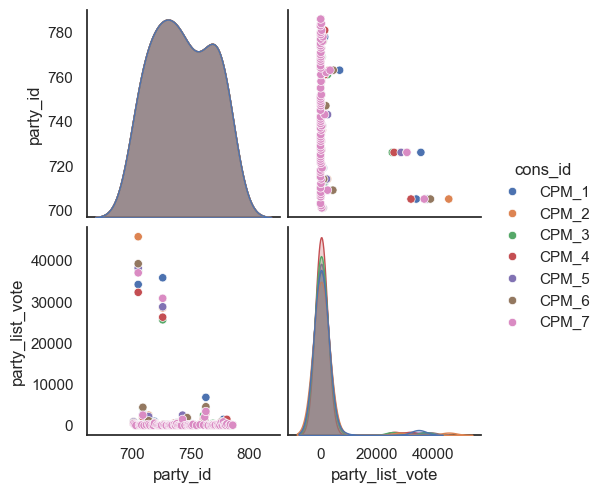

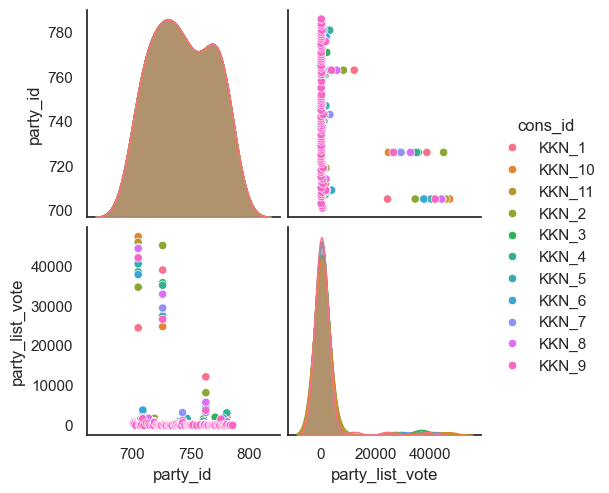

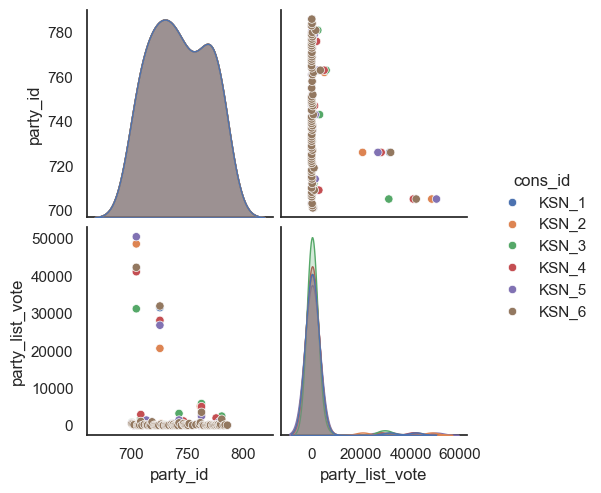

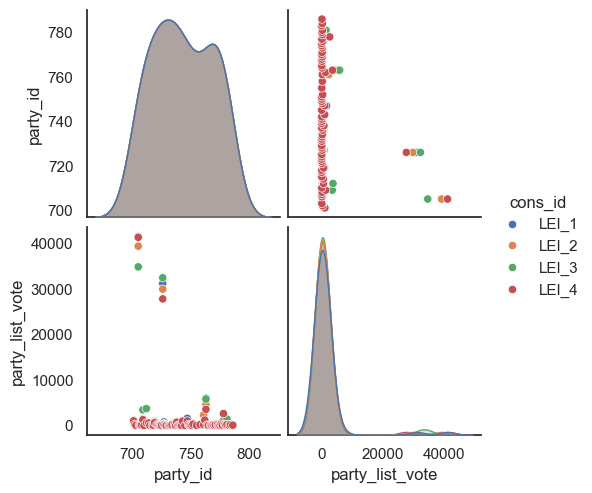

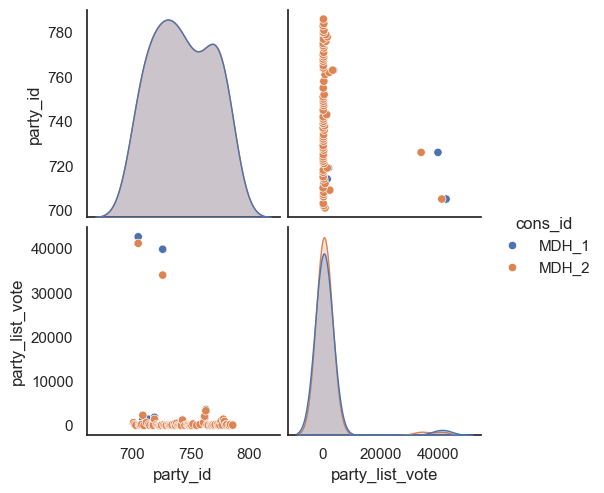

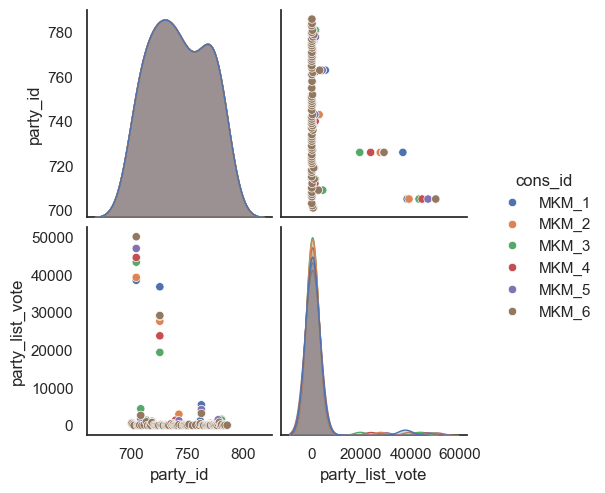

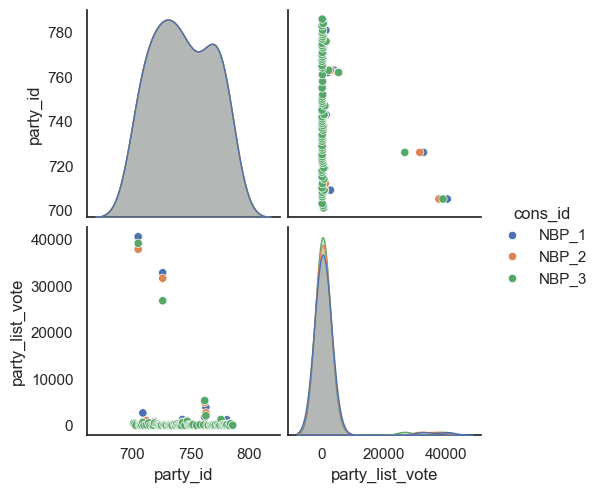

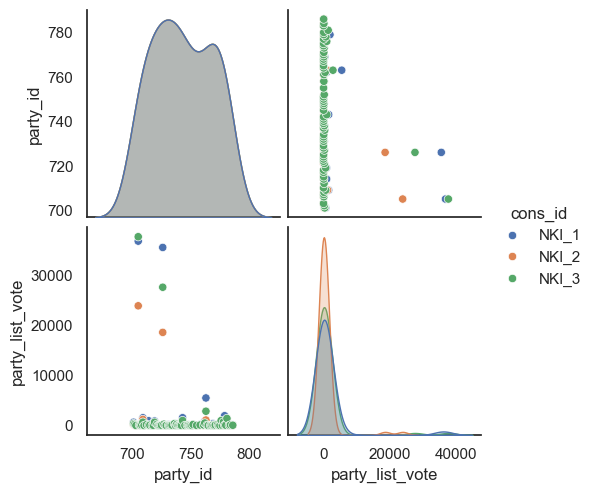

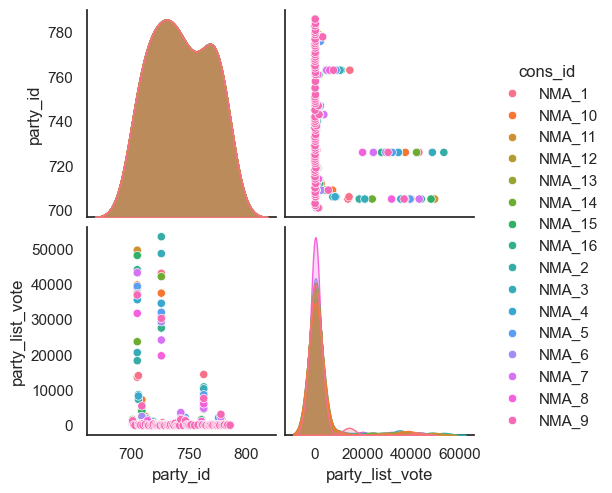

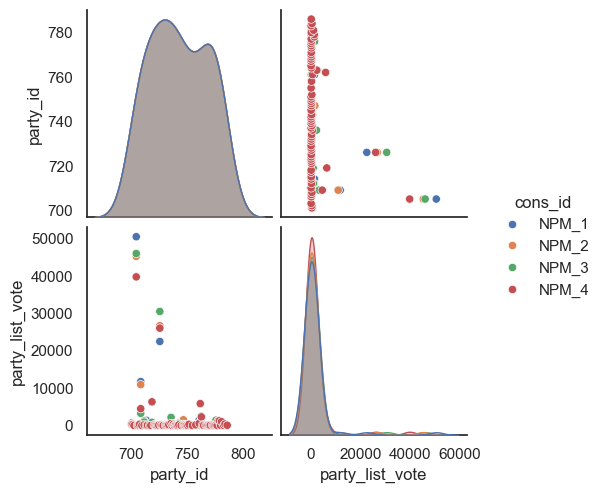

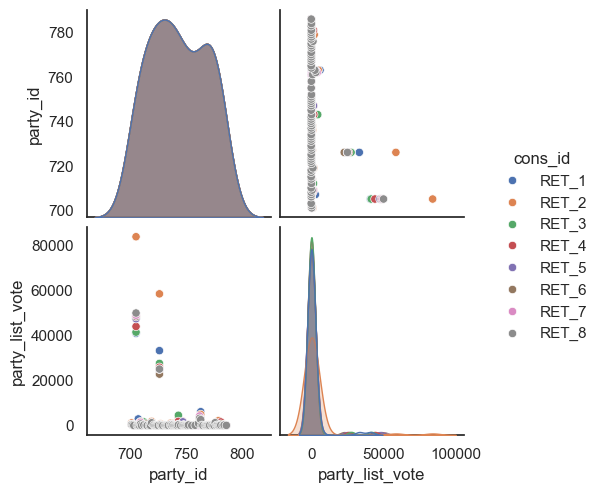

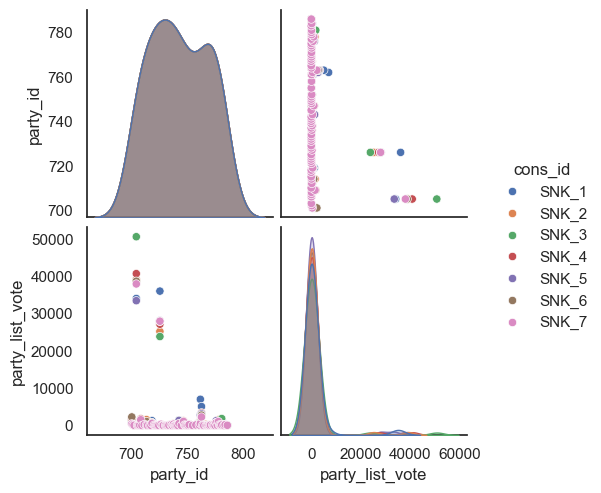

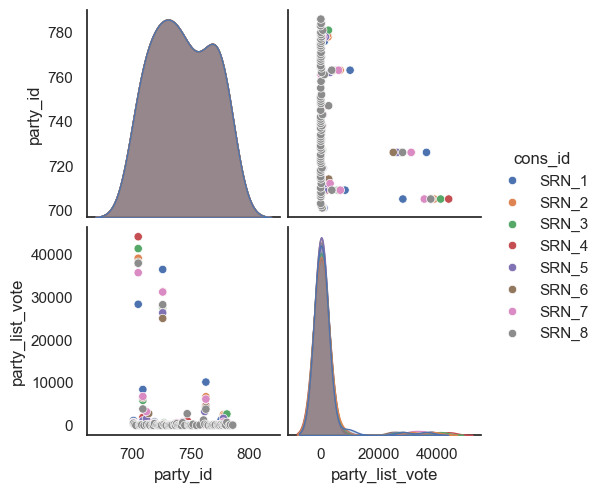

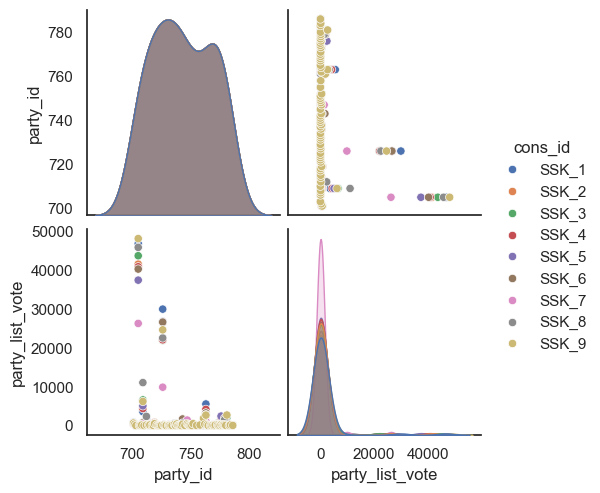

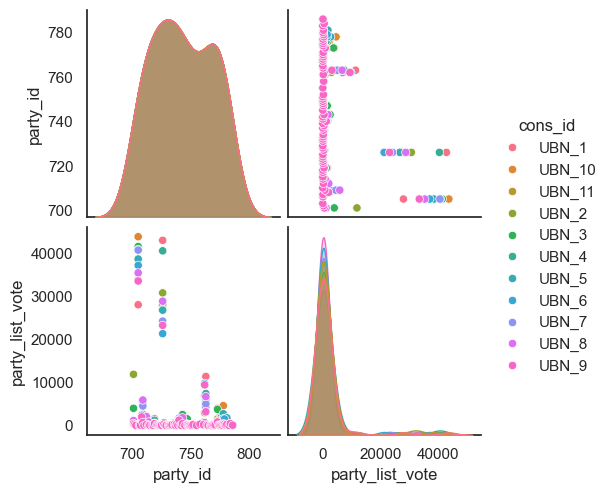

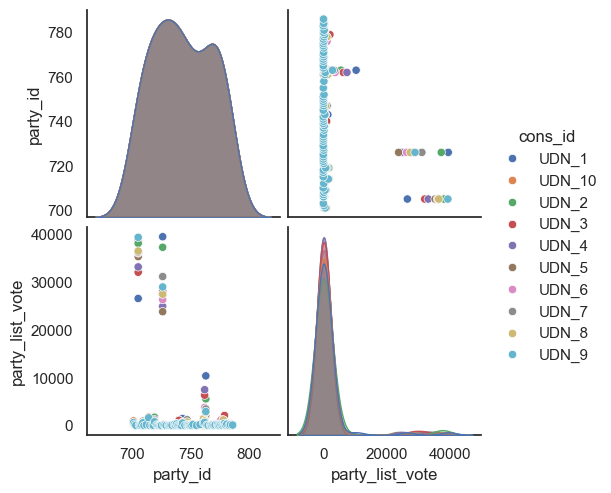

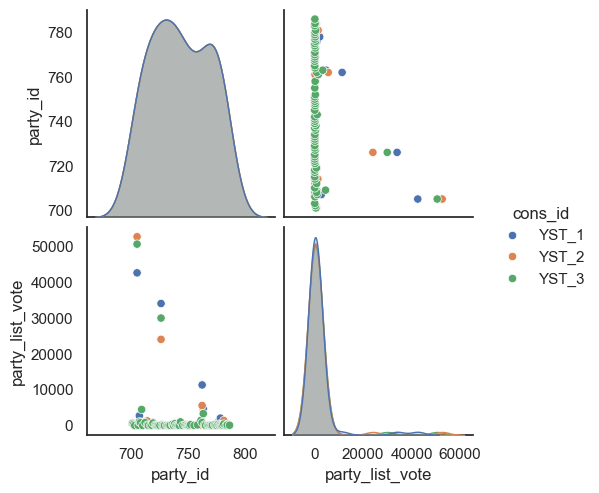

In [88]:
for province in valid_provinces:
    sns.pairplot(df_rcp[province],hue='cons_id')

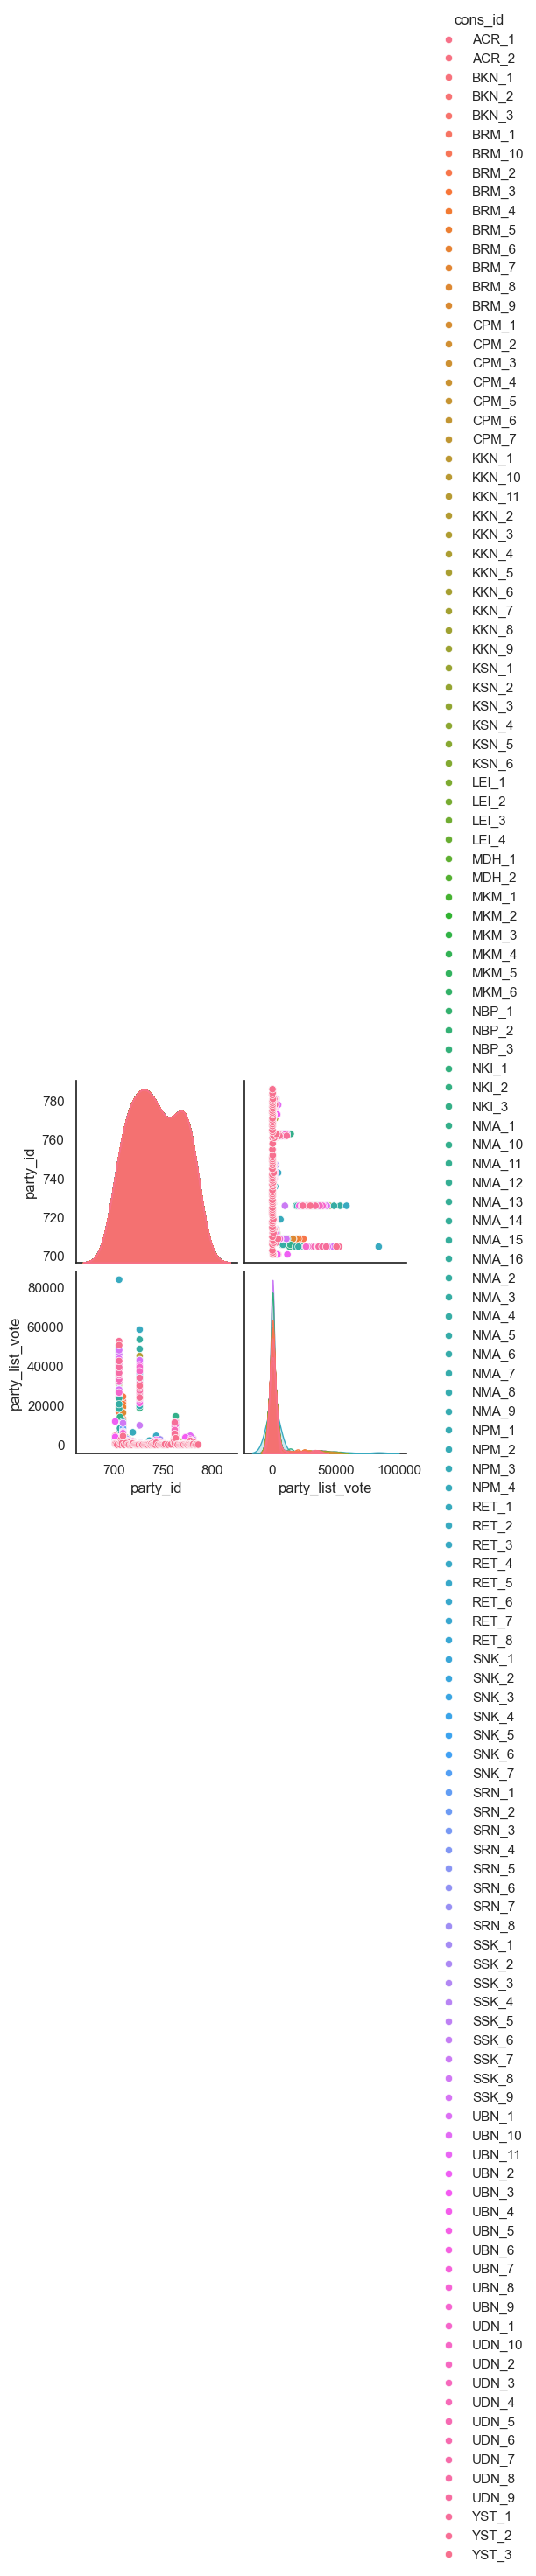

In [89]:
sns.pairplot(df_rcp_drop,hue='cons_id')

In [90]:
# Pivot the DataFrame
pivoted_df = df_rcp_drop.pivot(index='cons_id', columns='party_id', values='party_list_vote').reset_index()

# Rename columns and fill NaN values with 0
pivoted_df.columns = [f'party_{col}' if col != 'cons_id' else col for col in pivoted_df.columns]
pivoted_df = pivoted_df.fillna(0)

# Find the party with the most votes for each cons_id
party_id = pivoted_df.iloc[:, 1:].idxmax(axis=1)

# Create a new column to store the result
pivoted_df['party_id'] = party_id.str.split('_').str.get(1)

# Assuming df_prov_drop['party_id'] is a string data type, convert it to int64
pivoted_df['party_id'] = pivoted_df['party_id'].astype('int64')

pivoted_df


,cons_id,party_701,party_702,party_703,party_705,party_706,party_707,party_708,party_709,party_710,...,party_776,party_777,party_778,party_779,party_780,party_781,party_783,party_784,party_786,party_id
0,ACR_1,4550,185,67,33576,132,76,1723,9761,13,...,131,85,211,493,133,325,11,215,98,726
1,ACR_2,2362,189,41,36243,77,78,2354,8259,12,...,219,90,896,130,142,1036,13,287,99,705
2,BKN_1,343,239,15,35797,64,43,93,4382,2,...,1111,48,141,114,63,144,6,125,53,705
3,BKN_2,250,217,21,34191,35,56,1334,2915,5,...,498,59,1109,408,93,165,8,178,57,705
4,BKN_3,371,238,20,36141,71,59,88,4274,4,...,168,62,1315,67,70,137,9,276,64,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,UDN_8,405,209,20,36527,83,62,144,634,11,...,147,68,1176,113,86,401,5,189,65,705
129,UDN_9,628,261,36,39407,84,76,206,578,4,...,208,55,245,436,108,280,6,162,97,705
130,YST_1,585,218,29,42534,131,2722,122,920,7,...,890,57,2062,72,96,128,35,547,62,705
131,YST_2,717,280,25,52600,55,54,121,810,13,...,141,45,141,62,64,1401,11,347,53,705


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

# Encode 'most_vote_party'
label_encoder = LabelEncoder()
pivoted_df['party_id'] = label_encoder.fit_transform(pivoted_df['party_id'])

# Perform one-hot encoding for 'cons_id'
merge_df = pd.get_dummies(pivoted_df, columns=['cons_id'], prefix='cons_id')

# Define your features (X) and target (y)
X = merge_df.drop('party_id', axis=1)
y = merge_df['party_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_train)

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        13

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Confusion matrix 
[[86  0]
 [ 0 13]]


<Figure size 640x480 with 0 Axes>

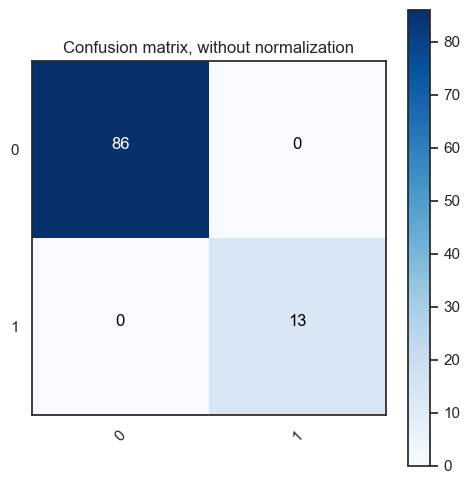

In [92]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [93]:
#Predict on training set
y_pred = dt_model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.50      0.67         6

    accuracy                           0.91        34
   macro avg       0.95      0.75      0.81        34
weighted avg       0.92      0.91      0.90        34

Confusion matrix 
[[28  0]
 [ 3  3]]


<Figure size 640x480 with 0 Axes>

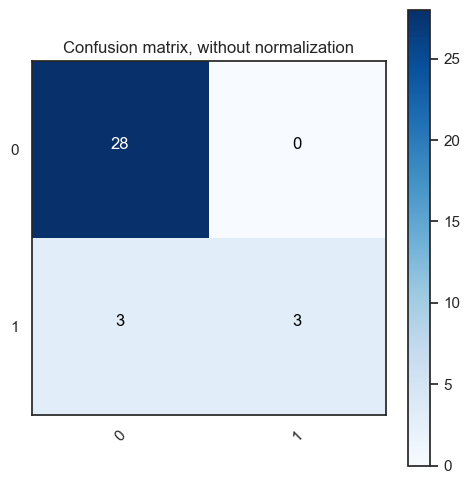

In [94]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')